In [20]:
from jitcdde import jitcdde, y, t
from parameters import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Define system

In [21]:
# %%
# CORE
# fuel nodes
T_c_f1 = W_f/(m_f_c)*(y(6,t-tau_hx_c_f)-y(0)) + (k_f1*P*y(25)/mcp_f_c) + (hA_ft_c*k_1*(y(19)-y(0))/mcp_f_c)  # T_cf1: y(0)
T_c_f2 = W_f/(m_f_c)*(y(0)-y(1)) + (k_f2*P*y(25)/mcp_f_c) + (hA_ft_c*k_2*(y(19)-y(1))/mcp_f_c)               # T_cf2: y(1)

# tubes
T_c_t1 = (hA_ft_c/mcp_t_c)*(y(0)-y(2)) + (hA_tc/mcp_t_c)*(y(10)-y(2))                                        # T_ht1: y(2)

# coolant 
T_c_c1 = W_c/m_c_c*(y(11,t-tau_hx_c_c)-y(3)) + (hA_tc*k_1*(y(2)-y(3))/mcp_c_c)                                # T_cc1: y(3)
T_c_c2 = W_c/m_c_c*(y(3)-y(4)) + (hA_tc*k_2*(y(2)-y(4))/mcp_c_c)                                             # T_cc1: y(4)  

# FUEL-HELIUM HX
# fuel nodes
T_hfh_f1 = W_f/m_f_hx*(y(1,t-tau_c_hx_f)-y(1)) + (hA_ft_hx*k_1*(y(7)-y(5))/mcp_f_hx)                         # T_cf1: y(5)
T_hfh_f2 = W_f/m_f_hx*(y(5)-y(6)) + (hA_ft_hx*k_2*(y(7)-y(6))/mcp_f_hx)                                      # T_cf2: y(6)

# tubes
T_hfh_t1 = (hA_ft_hx/mcp_t_hx)*(y(5)-y(7)) + (hA_ft_hx/mcp_t_hx)*(y(6)-y(2))                                 # T_ht1: y(7)

# helium
T_hfh_h1 = W_hfh_h1/(m_h_hxfh)*(y(16,t-tau_hx_c_c)-y(8)) + (hA_th*k_1*(y(7)-y(8))/mcp_h_hxfh)                  # T_cc1: y(8) 
T_hfh_h2 = W_hfh_h2/(m_h_hxfh)*(y(3)-y(4)) + (hA_th*k_2*(y(7)-y(9))/mcp_h_hxfh)                               # T_cc1: y(9) 


# COOLANT-HELIUM HX
# fuel nodes
T_hch_c1 = W_c/m_c_hx*(y(4,t-tau_c_hx_f)-y(10)) + (hA_ft_hx*k_1*(y(12)-y(10))/mcp_h_c)                       # T_cf1: y(10)
T_hch_c2 = W_c/m_c_hx*(y(10)-y(11)) + (hA_ft_hx*k_2*(y(12)-y(11))/mcp_h_c)                                   # T_cf2: y(11)

# tubes
T_hch_t1 = (hA_ft_hx/mcp_t_hx)*(y(10)-y(12)) + (hA_ft_hx/mcp_t_hx)*(y(11)-y(12))                             # T_ht1: y(12)

# helium
T_hch_h1 = W_hch_h1/m_h_hxfh*(y(16,t-tau_hx_c_c)-y(13)) + (hA_th*k_1*(y(12)-y(13))/mcp_h_hxfh)                 # T_cc1: y(13) 
T_hch_h2 = W_hch_h2/m_h_hxfh*(y(13)-y(14)) + (hA_th*k_2*(y(12)-y(14))/mcp_h_hxfh)                             # T_cc1: y(14) 

# HELIUM-WATER HX (FUEL LOOP)
# fuel nodes
T_hhwf_h1 = W_hhwf_h1/m_h_hxhw*(y(9,t-tau_c_hx_f)-y(15)) + (hA_ft_hx*k_1*(y(17)-y(15))/mcp_h_c)                # T_cf1: y(15)
T_hhwf_h2 = W_hhwf_h2/m_h_hxhw*(y(10)-y(11)) + (hA_ft_hx*k_2*(y(12)-y(11))/mcp_h_c)                            # T_cf2: y(16)

# tubes
T_hhwf_t1 = (hA_ft_hx/mcp_t_hx)*(y(10)-y(17)) + (hA_ft_hx/mcp_t_hx)*(y(11)-y(17))                              # T_ht1: y(17)

# water
T_hhwf_w1 = W_hhwf_w/m_w*(T0_hhwf_w1-y(18)) + (hA_ft_hx*k_1*(y(17)-y(18))/mcp_w)                               # T_cc1: y(18) 
T_hhwf_w2 = W_hhwf_w/m_w*(y(18)-y(19)) + (hA_th*k_2*(y(17)-y(19))/mcp_w)                                       # T_cc1: y(19) 

# HELIUM-WATER HX (COOLANT LOOP)
# fuel nodes
T_hhwc_h1 = W_hhwc_h1/m_h_hxhw*(y(14,t-tau_c_hx_f)-y(20)) + (hA_ft_hx*k_1*(y(22)-y(20))/mcp_h_c)                # T_cf1: y(20)
T_hhwc_h2 = W_hhwc_h2/m_h_hxhw*(y(20)-y(21)) + (hA_ft_hx*k_2*(y(22)-y(21))/mcp_h_c)                            # T_cf2: y(21)

# tubes
T_hhwc_t1 = (hA_ft_hx/mcp_t_hx)*(y(20)-y(22)) + (hA_ft_hx/mcp_t_hx)*(y(21)-y(22))                              # T_ht1: y(22)

# water
T_hhwc_w1 = W_hhwc_w/m_w*(T0_hhwf_w1-y(23)) + (hA_ft_hx*k_1*(y(22)-y(23))/mcp_w)                               # T_cc1: y(23) maybe don't need these nodes
T_hhwc_w2 = W_hhwc_w/m_w*(y(23)-y(24)) + (hA_th*k_2*(y(22)-y(24))/mcp_w)                                       # T_cc1: y(24) 

n = (y(33)-beta_t)*y(25)/Lam+lam[0]*y(26)+lam[1]*y(27)+lam[2]*y(28)+lam[3]*y(29)+lam[4]*y(30)+lam[5]*y(31)      # n (no source insertion): y(25)
#n = lam[0]*y(13)+lam[1]*y(14)+lam[2]*y(15)+lam[3]*y(16)+lam[4]*y(17)+lam[5]*y(18)      # n (no source insertion): y(25)

# dC_i/dt (precursor concentrations)
C1 = y(25)*beta[0]/Lam-lam[0]*y(26)-y(26)/tau_c+y(13,t-tau_l)*np.exp(-lam[0]*tau_l)/tau_c                       # C1: y(26)
C2 = y(25)*beta[1]/Lam-lam[1]*y(27)-y(27)/tau_c+y(14,t-tau_l)*np.exp(-lam[1]*tau_l)/tau_c                       # C2: y(27)
C3 = y(25)*beta[2]/Lam-lam[2]*y(28)-y(28)/tau_c+y(15,t-tau_l)*np.exp(-lam[2]*tau_l)/tau_c                       # C3: y(28)
C4 = y(25)*beta[3]/Lam-lam[3]*y(29)-y(29)/tau_c+y(16,t-tau_l)*np.exp(-lam[3]*tau_l)/tau_c                       # C4: y(29)
C5 = y(25)*beta[4]/Lam-lam[4]*y(30)-y(30)/tau_c+y(17,t-tau_l)*np.exp(-lam[4]*tau_l)/tau_c                       # C5: y(30)
C6 = y(25)*beta[5]/Lam-lam[5]*y(31)-y(31)/tau_c+y(18,t-tau_l)*np.exp(-lam[5]*tau_l)/tau_c                       # C6: y(31)

# moderator
T_c_b = (k_b*P*y(25)/mcp_f_c) + (hA_ft_c*k_1*(y(2)-y(32))/mcp_f_c)      # T_c_b: y(32)

rho = (a_f/2)*(T_c_f1 + T_c_f2) + (a_b)*(T_c_b)           # rho: y(33)

Initial values & solve

In [25]:
# instantiate jitcdde object
DDE = jitcdde([T_c_f1,T_c_f2,T_c_t1,T_c_c1,T_c_c2,T_hfh_f1,T_hfh_f2,T_hfh_t1,T_hfh_h1,T_hfh_h2,
               T_hch_c1,T_hch_c2,T_hch_t1,T_hch_h1,T_hch_h2,T_hhwf_h1,T_hhwf_h2,T_hhwf_t1,T_hhwf_w1,T_hhwf_w2,
               T_hhwc_h1,T_hhwc_h2,T_hhwc_t1,T_hhwc_w1,T_hhwc_w2,n,C1,C2,C3,C4,C5,C6,T_c_b,rho])

# set initial conditions
DDE.constant_past([T0_c_f1,T0_c_f2,T0_c_t1,T0_c_c1,T0_c_c2,T0_hfh_f1,T0_hfh_f2,T0_hfh_t1,T0_hfh_h1,T0_hfh_h2,
               T0_hch_c1,T0_hch_c2,T0_hch_t1,T0_hch_h1,T0_hch_h2,T0_hhwf_h1,T0_hhwf_h2,T0_hhwf_t1,T0_hhwf_w1,T0_hhwf_w2,
               T0_hhwc_h1,T0_hhwc_h2,T0_hhwc_t1,T0_hhwc_w1,T0_hhwc_w2,n_frac0,C0[0],C0[1],C0[2],C0[3],C0[4],C0[5],T0_c_b,0.0])

DDE.step_on_discontinuities()

# jitcdde solver parameters 
t0 = 0.0
tf = 100.00
T = np.arange(t0,tf,0.01)

sol_jit = []
for t_x in T:
    sol_jit.append(DDE.integrate(t_x))

Generating, compiling, and loading C code.
Using default integration parameters.


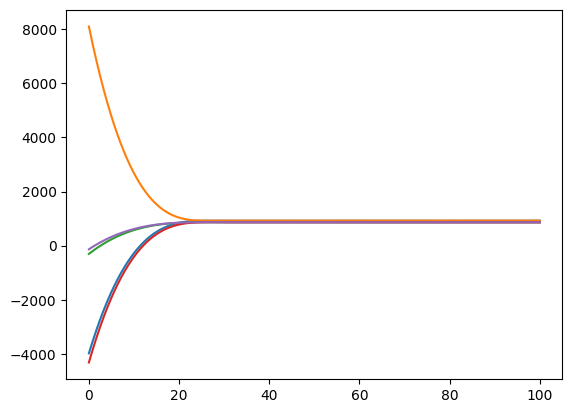

In [35]:
# core temps
plt.plot(T,[s[0] for s in sol_jit])
plt.plot(T,[s[1] for s in sol_jit])
plt.plot(T,[s[2] for s in sol_jit])
plt.plot(T,[s[3] for s in sol_jit])
plt.plot(T,[s[4] for s in sol_jit])


# CHECK WHAT ALL INITIAL DERIVATIVES ARE